<a href="https://colab.research.google.com/github/pseeej/MachineLearning_DCLAB/blob/master/DL%20for%20Everyone/21.%20AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

In [11]:
# MNIST data set 호출
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

In [12]:
# 생성자 모델 만들기
autoencoder = Sequential()

In [13]:
# 인코딩 부분(# 입력된 값의 차원을 축소. MaxPooling 이용해서.)
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size = 3, strides=2, padding='same', activation='relu'))

In [14]:
# 디코딩 부분(차원을 점차 늘려 입력 값과 똑같은 크기의 출력 값을 내보내도록 함. UpSampling 이용해서.)
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu')) # 크기 유지시켜주는 padding 과정 없으므로 커널 적용되면서 크기 줄어들음.
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [15]:
# 전체 구조 확인
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 8, 8, 8)          

In [16]:
# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 75s 158ms/step - loss: 0.1989 - val_loss: 0.1338
Epoch 2/50
469/469 [==============================] - 75s 160ms/step - loss: 0.1260 - val_loss: 0.1184
Epoch 3/50
469/469 [==============================] - 76s 163ms/step - loss: 0.1156 - val_loss: 0.1110
Epoch 4/50
469/469 [==============================] - 77s 163ms/step - loss: 0.1096 - val_loss: 0.1059
Epoch 5/50
469/469 [==============================] - 77s 165ms/step - loss: 0.1053 - val_loss: 0.1021
Epoch 6/50
469/469 [==============================] - 76s 162ms/step - loss: 0.1017 - val_loss: 0.0990
Epoch 7/50
469/469 [==============================] - 75s 160ms/step - loss: 0.0991 - val_loss: 0.0970
Epoch 8/50
469/469 [==============================] - 75s 160ms/step - loss: 0.0971 - val_loss: 0.0950
Epoch 9/50
469/469 [==============================] - 75s 160ms/step - loss: 0.0953 - val_loss: 0.0937
Epoch 10/50
469/469 [==============================] - 75s 160ms/step - l

In [17]:
# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size=5)

In [18]:
# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test) # 앞서 만든 오토인코더 모델에 넣기

In [19]:
plt.figure(figsize=(7, 2))  # 출력 이미지 크기 정하기

<Figure size 504x144 with 0 Axes>

<Figure size 504x144 with 0 Axes>

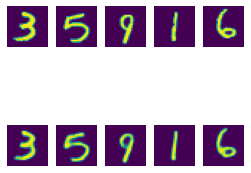

In [20]:
for i, image_idx in enumerate(random_test):
  # 랜덤으로 뽑은 이미지를 차례로 나열
  ax = plt.subplot(2, 7, i+1)
  # 테스트할 이미지를 먼저 그대로 보여줌
  plt.imshow(X_test[image_idx].reshape(28, 28))
  ax.axis('off')
  ax = plt.subplot(2, 7, 7+i+1)
  # 오토인코딩 결과를 다음 열에 입력
  plt.imshow(ae_imgs[image_idx].reshape(28, 28))
  ax.axis('off')
plt.show()